# ***C/NC DNA Detecting Code***

---



> This code to detect the coding and noncoding splice sites using chaos game representation, Chaos game representation (CGR) is an iterative mapping technique that assigns each nucleotide in a DNA sequence to a respective position on the plane in a one-to-one manner. **bold text



In [2]:
%matplotlib inline
import numpy as np
import os
import imageio
import matplotlib.pylab as plt
import math
import pandas as pd
from collections import defaultdict
from pathlib import Path
from numpy.random import seed
import sys
ep = sys.float_info.epsilon
import seaborn as sn
from sklearn import metrics
from sklearn import model_selection
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


after start anything, we must create two lists : 

---



1. inp_out_needed list : that contain all datat frame that we will craete in next step that contain coding & noncoding of train & test cgr images.

2. paths list : that contain path of each data (coding & noncoding of train & test cgr images) on your google drive.


 

In [0]:
inp_out_needed=['train_coding_df1','train_noncoding_df1','test_coding_df1','test_noncoding_df1']
paths={'train_coding_df1':'/content/drive/My Drive/project/ML_cgr_data/train/coding_seq','train_noncoding_df1':'/content/drive/My Drive/project/ML_cgr_data/train/non_codingseq','test_coding_df1':'/content/drive/My Drive/project/ML_cgr_data/test/coding','test_noncoding_df1':'/content/drive/My Drive/project/ML_cgr_data/test/noncoding'}

# ***First*** : read each CGR image and flat it to row in data frame to intilization machine learning processing


In [0]:
# df_image is a subfunction to create data frame from read each CGR image where each row is one image

In [0]:
def df_image(Images):
  Images1=sorted(Images) # sort them ascendingly 
  ImagF=np.zeros((len(Images),497664))  # All Images
  for i in range(len(Images1)):
      ImagF_1=imageio.imread(Images1[i])
      ImagF[i,:]=ImagF_1.reshape((1,497664))
  return pd.DataFrame(ImagF)

# ***Second*** : Assgin class to coding and noncoding images to can make classification

In [0]:
# clas_assign is a subfunction to assign class 1 (one) to each coding cgr images data frame and class 0 (zero) to  noncoding cgr images data frame

In [0]:
def clas_assign(Images,c,b):
  c= df_image(Images)
  if b.split('_')[1] =='coding':
    c['y']=np.ones((len(c)))
  elif b.split('_')[1] =='noncoding':
    c['y']=np.zeros((len(c)))
  return c

# ***Third***: Create Train & Test Data Frame that contain coding and noncoding images :

train data frame = train coding cgr image (with class one ) + train noncoding cgr image (with class zero )

 &
  test data frame = test coding cgr image (with class one ) + test noncoding cgr image (with class zero )
  
  
  By two step A & B & C

In [0]:
#A- For loop to make data frame from taking different types of images (coding & noncoding) from different folder (tain & test)  

In [0]:
for c in inp_out_needed:
  b=c
  home_path = os.getcwd()
  path=paths[c]
  os.chdir(path)
  Images=os.listdir()
  exec('{} = clas_assign(Images,c,b)'.format(c))

In [0]:
# B- Merge codind & noncoding traing data (after assign class to each one ) in one train data frame and
# codind & noncoding testing data (after assign class to each one ) in one test data frame 

In [0]:
# merge coding sequence of train data to noncoding sequence of train data to obtain training sequence data frame
train_coding_noncoding1=pd.concat([train_coding_df1,train_noncoding_df1])
# merge coding sequence of test data to noncoding sequence of test data to obtain testing sequence data frame
test_coding_noncoding1=pd.concat([test_coding_df1,test_noncoding_df1])

In [0]:
# C - split train dataframe (from step B ) to X_train (data) & y_train (labeles) variables to can start machine learning classification

In [0]:
X_train=train_coding_noncoding1.iloc[:,:-1]
X_test=test_coding_noncoding1.iloc[:,:-1]
y_train=train_coding_noncoding1.iloc[:,-1]
y_test=test_coding_noncoding1.iloc[:,-1]

In [0]:
# Statistical Data Analysis :

In [52]:
X_train_mean=np.mean(X_train)
print('mean=',X_train_mean)
X_train_median=np.median(X_train)
print('median=',X_train_median)

mean= 0         255.0
1         255.0
2         255.0
3         255.0
4         255.0
          ...  
497659    255.0
497660    255.0
497661    255.0
497662    255.0
497663    255.0
Length: 497664, dtype: float64
median= 255.0


In [0]:
df_resultcol=['NaiveBayes','logistic regression','KNN','Perceptron']
df_resultrow=['Accuracy','Cross_Validation','Confusion_Matrix']

In [12]:
df_result=pd.DataFrame(columns=df_resultcol,index=df_resultrow)
df_result

NaiveBayes logistic regression  KNN Perceptron
Accuracy                NaN                 NaN  NaN        NaN
Cross_Validation        NaN                 NaN  NaN        NaN
Confusion_Matrix        NaN                 NaN  NaN        NaN

In [0]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [14]:
X_train_mean=np.mean(X_train)
print('mean=',X_train_mean)
X_train_median=np.median(X_train)
print('median=',X_train_median)

mean= -1.3298208127954922e-19
median= 0.0


# ***Forth*** : Apply different type of classification in  :

1- Naive Bayes Classifier (supervised linear classifier)

2- Logistic regression (supervised linear classifier)

3- k-nearst neighbor classifier ( supervised nonlinear classifier)


4- perceptron (supervised linear classifier)



In [0]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=40)
#X_train=pca.fit_transform(X_train)
#X_test=pca.fit_transform(X_test) 

In [0]:
#1- Naive Bayes Classifier

Naive Bayes is a statistical classification using Bayes Theorem, supervised linear classifiers learning algorithms. It is easy and fast and high accuracy classification algorithm, which is easy use for a large data, Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features.

In [55]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model_n = GaussianNB()

# Train the model using the training sets
model_n.fit(X_train, y_train)

#Predict Output
y_pred_nai = model_n.predict(X_test) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_naiv=confusion_matrix(y_test,y_pred_nai)
cm_naiv

array([[ 5, 15],
       [ 0, 20]])

Text(0.5, 1.0, 'Confusion Matrix Naive Bayes')

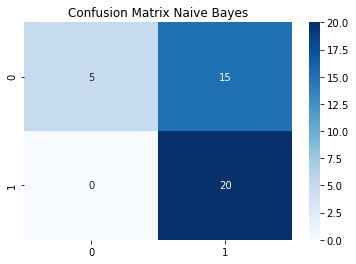

In [57]:
os.chdir(home_path)
cm_picture_nav=sn.heatmap(pd.DataFrame(cm_naiv),cmap="Blues", annot=True)
figure1 = cm_picture_nav.get_figure()   
plt.title("Confusion Matrix Naive Bayes")
figure1.savefig('/content/drive/My Drive/project/ML_cgr_data/Confusion_NaiveBayes.jpg', dpi=400)

In [58]:
#Calculate Accuracy and Print it
accu_navie=sum([1 for i, j in zip(y_pred_nai, y_test) if i == j])/len(y_test)
print("Accuracy = " ,accu_navie*100, "%")

Accuracy =  62.5 %


In [59]:
# calculating the mean R^2 for a set of predictions:
results_naiv = model_selection.cross_val_score(model_n, X_train, y_train,cv=None)
results_naiv

array([0.875 , 1.    , 0.9375, 0.75  , 0.625 ])

In [60]:
df_result['NaiveBayes']=pd.Series({'Accuracy':accu_navie,'Cross_Validation':results_naiv,'Confusion_Matrix':cm_naiv})
df_result

NaiveBayes  ... Perceptron
Accuracy                                      0.625  ...        NaN
Cross_Validation  [0.875, 1.0, 0.9375, 0.75, 0.625]  ...        NaN
Confusion_Matrix                 [[5, 15], [0, 20]]  ...        NaN

[3 rows x 4 columns]

In [0]:
#2- logistic regression

 Logistic regression gives you a discrete outcome
, Logistic Regression performs well when the dataset is linearly separable.
, Logistic Regression measures the relationship between the dependent variable (our label, what we want to predict)  and the one or more independent variables (our features), by estimating probabilities using it’s underlying logistic function. These probabilities must then be transformed into binary values in order to actually make a prediction. This is the task of the logistic function,
 also called the sigmoid function. The Sigmoid-Function is an S-shaped curve that can take any real-valued number and map it into a value between the range of 0 and 1, but never exactly at those limits. This values between 0 and 1 will then be transformed into either 0 or 1 using a threshold classifier. It is a widely used technique because it is very efficient, does not require too many computational resources, it’s highly interpretable, it doesn’t require input features to be scaled, it doesn’t require any tuning, it’s easy to regularize, and it outputs well-calibrated predicted probabilities. Because of its simplicity and the fact that it can be implemented relatively easy and quick

A disadvantage of it is that we can’t solve non-linear problems with logistic regression since it’s decision surface is linear. 

In [0]:
# Logistic regression gives you a discrete outcome
# Logistic Regression performs well when the dataset is linearly separable.
# Logistic Regression measures the relationship between the dependent variable (our label, what we want to predict) 
# and the one or more independent variables (our features), by estimating probabilities using it’s underlying logistic function.
# These probabilities must then be transformed into binary values in order to actually make a prediction. This is the task of the logistic function,
# also called the sigmoid function. The Sigmoid-Function is an S-shaped curve that can take any real-valued number and map it into a value between the range of 0 and 1,
# but never exactly at those limits. This values between 0 and 1 will then be transformed into either 0 or 1 using a threshold classifier.
# It is a widely used technique because it is very efficient, does not require too many computational resources, it’s highly interpretable,
# it doesn’t require input features to be scaled, it doesn’t require any tuning, it’s easy to regularize, and it outputs well-calibrated predicted probabilities.
# Because of its simplicity and the fact that it can be implemented relatively easy and quick


# A disadvantage of it is that we can’t solve non-linear problems with logistic regression since it’s decision surface is linear. 

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

In [0]:
clf =linear_model.LogisticRegression().fit(X_train, y_train)

In [0]:
y_pred_log1=clf.predict(X_test)

In [63]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_logistic=confusion_matrix(y_test,y_pred_log1)
cm_logistic

array([[20,  0],
       [ 7, 13]])

Text(0.5, 1.0, 'Confusion Matrix Logistic Regression')

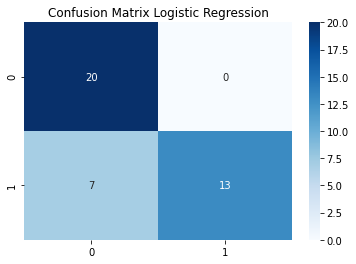

In [64]:
os.chdir(home_path)
cm_picture_logistic=sn.heatmap(pd.DataFrame(cm_logistic),cmap="Blues", annot=True)
figure1 = cm_picture_logistic.get_figure()   
plt.title("Confusion Matrix Logistic Regression")
figure1.savefig('/content/drive/My Drive/project/ML_cgr_data/Confusion_Logistic.jpg', dpi=400)

In [65]:
#Calculate Accuracy and Print it
accu_log=sum([1 for i, j in zip(y_pred_log1, y_test) if i == j])/len(y_test)
print("Accuracy = " ,accu_log*100, "%")

Accuracy =  82.5 %


In [66]:
clf.score(X_test, y_test)

0.825

In [67]:
# calculating the mean R^2 for a set of predictions:
results_log = model_selection.cross_val_score(clf, X_train, y_train,cv=5, scoring='r2')
results_log

array([0.75, 1.  , 0.75, 1.  , 1.  ])

In [68]:
df_result['logistic regression']=pd.Series({'Accuracy': accu_log,'Cross_Validation':results_log,'Confusion_Matrix':cm_logistic})
df_result

NaiveBayes  ... Perceptron
Accuracy                                      0.625  ...        NaN
Cross_Validation  [0.875, 1.0, 0.9375, 0.75, 0.625]  ...        NaN
Confusion_Matrix                 [[5, 15], [0, 20]]  ...        NaN

[3 rows x 4 columns]

In [0]:
# 3- KNN:

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
neigh = KNeighborsClassifier(n_neighbors=25, metric= 'euclidean')
neigh.fit(X_train, y_train)

preds1 = neigh.predict(X_test)
preds1.shape


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

(40,)

In [0]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(y_test,preds1)
cm_knn

array([[14,  6],
       [ 0, 20]])

Text(0.5, 1.0, 'Confusion Matrix KNN')

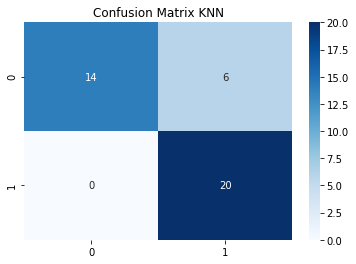

In [0]:
os.chdir(home_path)
cm_picture2=sn.heatmap(pd.DataFrame(cm_knn),cmap="Blues", annot=True)
figure2 = cm_picture2.get_figure()   
plt.title("Confusion Matrix KNN")
figure2.savefig('/content/drive/My Drive/project/ML_cgr_data/Confusion_KNN.jpg', dpi=400)

In [0]:
#Calculate Accuracy and Print it
accu_knn=sum([1 for i, j in zip(preds1, y_test) if i == j])/len(y_test)
print("Accuracy = " ,accu_knn*100, "%")

Accuracy =  85.0 %


In [0]:
neigh.score(X_test, y_test)

0.85

**Cross Validation**

Cross-validation consists in repetively splitting the data in pairs of train and test sets, called ‘folds’. Scikit-learn comes with a function to automatically compute score on all these folds. Here we do KFold with k=5.

In [0]:
np.random.shuffle(train_coding_noncoding1)
np.random.shuffle(test_coding_noncoding1)

In [0]:
X_train=train_coding_noncoding1.iloc[:,:-1]
X_test=test_coding_noncoding1.iloc[:,:-1]
y_train=train_coding_noncoding1.iloc[:,-1]
y_test=test_coding_noncoding1.iloc[:,-1]

In [0]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5)
cross_val_knn=cross_val_score(neigh,X_train, y_train, cv=cv)

In [0]:
df_result['KNN']=pd.Series({'Accuracy':accu_knn,'Cross_Validation':cross_val_knn,'Confusion_Matrix':cm_knn})
df_result

NaiveBayes  ... Perceptron
Accuracy                                      0.625  ...        NaN
Cross_Validation  [0.875, 1.0, 0.9375, 0.75, 0.625]  ...        NaN
Confusion_Matrix                 [[5, 15], [0, 20]]  ...        NaN

[3 rows x 4 columns]

In [0]:
# 4- Perceptron

In [0]:
from sklearn.linear_model import Perceptron
per=Perceptron(max_iter=20, eta0=0.1,shuffle=True)
per.fit(X_train, y_train)
Test_y=pd.Series(per.predict(X_test), name='y')

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=20, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_per=confusion_matrix(y_test,Test_y)
cm_per

array([[16,  4],
       [ 0, 20]])

Text(0.5, 1.0, 'Confusion Matrix Perceptron')

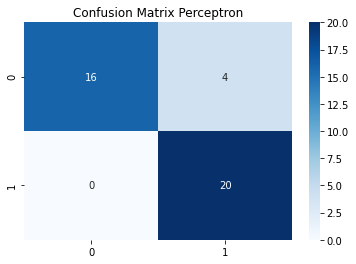

In [0]:
os.chdir(home_path)
cm_picture4=sn.heatmap(pd.DataFrame(cm_per),cmap="Blues", annot=True)
figure4 = cm_picture4.get_figure()   
plt.title("Confusion Matrix Perceptron")
figure4.savefig('/content/drive/My Drive/project/ML_cgr_data/Confusion_Perceptron.jpg', dpi=400)

In [0]:
per.score(X_test, y_test)

0.9

In [0]:
#Calculate Accuracy and Print it
accu_per=sum([1 for i, j in zip(Test_y, y_test) if i == j])/len(y_test)
print("Accuracy = " ,accu_per*100, "%")

Accuracy =  90.0 %


In [0]:
# calculating the mean R^2 for a set of predictions:
results_per = model_selection.cross_val_score(per, X_train, y_train,cv=5, scoring='r2')
results_per

array([0.75, 1.  , 1.  , 1.  , 1.  ])

In [0]:
df_result['Perceptron']=pd.Series({'Accuracy':accu_per,'Cross_Validation':results_per,'Confusion_Matrix':cm_per})
df_result

NaiveBayes  ...                  Perceptron
Accuracy                                      0.625  ...                         0.9
Cross_Validation  [0.875, 1.0, 0.9375, 0.75, 0.625]  ...  [0.75, 1.0, 1.0, 1.0, 1.0]
Confusion_Matrix                 [[5, 15], [0, 20]]  ...          [[16, 4], [0, 20]]

[3 rows x 4 columns]

# ***Fifth***: Model Selection

In This project we try to select best model for coding/noncoding DNA detection by two methods:
1. from built in outsource function from (https://scipy-lectures.org/packages/scikit-learn/index.html)
2. aggergate above result from each model in new data frame called **df_result**

In [0]:
# 1. outsourcing code

In [0]:
from sklearn import model_selection
from sklearn import metrics
for Model in [GaussianNB, LogisticRegression,KNeighborsClassifier,Perceptron]:
    clfsa = Model().fit(X_train, y_train)
    y_pred_model = clfsa.predict(X_test)
    print('%s: %s' % 
          (Model.__name__, metrics.f1_score(y_pred_model, y_test, average="macro"))) 

GaussianNB: 0.5636363636363637
LogisticRegression: 0.819471308833011
KNeighborsClassifier: 0.3220338983050847
Perceptron: 0.873015873015873


In [0]:
# 2. Create df_result to collect result on it:

In [0]:
df_result

NaiveBayes  ...                  Perceptron
Accuracy                                      0.625  ...                         0.9
Cross_Validation  [0.875, 1.0, 0.9375, 0.75, 0.625]  ...  [0.75, 1.0, 1.0, 1.0, 1.0]
Confusion_Matrix                 [[5, 15], [0, 20]]  ...          [[16, 4], [0, 20]]

[3 rows x 4 columns]

# **Conclusion**:

 from point 1 ana 2 , this project conclude **Perceptron** ( supervised learning, linear clasifier ) is best model for detecting coding DNA sequences from noncoding DNA sequences.